_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍕

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [65]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

#### Run this cell to load the data:

In [158]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._

## Part 1: Preprocessing

> You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

In [160]:
import category_encoders as ce
import pandas_profiling
from sklearn.model_selection import train_test_split

In [161]:
train, val = train_test_split(train, test_size=0.2)

In [162]:
val.shape

(10384, 17)

In [163]:
# profile = train.profile_report()

In [164]:
# profile

In [165]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
38349,588219,JASON'S DELI,JASON'S DELI,2129572.0,Restaurant,Risk 1 (High),195 N DEARBORN ST FL,CHICAGO,IL,60601.0,2012-01-27T00:00:00,License,NaN,41.885635,-87.629347,"{'longitude': '-87.62934689882326', 'latitude'...",0
30513,634838,CHI'S JAC ROBINS,CHI'S JAC ROBINS,44755.0,Restaurant,Risk 2 (Medium),5755 W 63RD ST,CHICAGO,IL,60638.0,2011-10-04T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.777845,-87.766381,"{'longitude': '-87.76638143708638', 'latitude'...",0
49864,315238,1400 MARKET PLACE,1400 MARKET PLACE,1222361.0,Grocery Store,Risk 1 (High),1400 N LAKE SHORE DR,CHICAGO,IL,60610.0,2010-07-29T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.907909,-87.625946,"{'longitude': '-87.62594577820322', 'latitude'...",0
14096,2150968,THE MONTCLARE SUPPORTIVE LIVING COMMUNITY,THE MONTCLARE SUPPORTIVE LIVING COMMUNITY,2523720.0,Long Term Care,Risk 1 (High),4339 W 18TH PL,CHICAGO,IL,60623.0,2018-03-26T00:00:00,Canvass,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",41.855772,-87.733888,"{'longitude': '-87.7338878999525', 'latitude':...",1
3162,1300301,BIN 36,BIN 36,1597897.0,Restaurant,Risk 1 (High),1559 N MILWAUKEE AVE,CHICAGO,IL,60622.0,2012-11-02T00:00:00,Canvass Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.909926,-87.676534,"{'longitude': '-87.67653435662255', 'latitude'...",0


In [166]:
train.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Fail                 int64
dtype: object

In [167]:
train['Facility Type'].value_counts(normalize=True).head(40)

Restaurant                          0.662822
Grocery Store                       0.134992
School                              0.073529
Daycare (2 - 6 Years)               0.015813
Bakery                              0.015765
Children's Services Facility        0.015741
Daycare Above and Under 2 Years     0.013033
Long Term Care                      0.007471
Catering                            0.006069
Mobile Food Dispenser               0.005319
Liquor                              0.005199
Daycare Combo 1586                  0.004497
Wholesale                           0.004086
Mobile Food Preparer                0.003071
Golden Diner                        0.002974
Hospital                            0.002877
TAVERN                              0.001547
Daycare (Under 2 Years)             0.001354
Special Event                       0.001281
Shared Kitchen User (Long Term)     0.001281
GAS STATION                         0.000677
KIOSK                               0.000653
Shelter   

In [168]:
train['Risk'].value_counts()

Risk 1 (High)      30176
Risk 2 (Medium)     8101
Risk 3 (Low)        3246
Name: Risk, dtype: int64

In [169]:
train['Inspection Type'].value_counts()

Canvass                                   19293
License                                    6228
Canvass Re-Inspection                      5061
Complaint                                  3961
License Re-Inspection                      2426
Complaint Re-Inspection                    1825
Short Form Complaint                       1681
License-Task Force                          182
Suspected Food Poisoning                    170
Consultation                                154
Tag Removal                                 118
Out of Business                              83
Task Force Liquor 1475                       81
Recent Inspection                            54
Suspected Food Poisoning Re-inspection       47
Complaint-Fire                               41
Short Form Fire-Complaint                    30
Special Events (Festivals)                   19
No Entry                                     16
Package Liquor 1474                          15
Complaint-Fire Re-inspection            

In [170]:
train[train['Inspection Type'].str.contains('Re-Inspection').isna()]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
37996,1946612,ARAMARL-FRESHII,FRESHII,2470318.0,Restaurant,Risk 1 (High),2650 N CLARK ST,CHICAGO,IL,60614.0,2016-07-14T00:00:00,NaN,NaN,41.930833,-87.644135,"{'longitude': '-87.64413543645641', 'latitude'...",0


In [171]:
train.isna().sum()

Inspection ID         0
DBA Name              0
AKA Name            497
License #             4
Facility Type       174
Risk                  9
Address               0
City                 48
State                10
Zip                  24
Inspection Date       0
Inspection Type       1
Violations         7778
Latitude            157
Longitude           157
Location            157
Fail                  0
dtype: int64

In [172]:
# Check distribution of Fail
train['Fail'].value_counts(normalize=True)
# Classes are somewhat imbalanced

0    0.741838
1    0.258162
Name: Fail, dtype: float64

In [173]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
38349,588219,JASON'S DELI,JASON'S DELI,2129572.0,Restaurant,Risk 1 (High),195 N DEARBORN ST FL,CHICAGO,IL,60601.0,2012-01-27T00:00:00,License,NaN,41.885635,-87.629347,"{'longitude': '-87.62934689882326', 'latitude'...",0
30513,634838,CHI'S JAC ROBINS,CHI'S JAC ROBINS,44755.0,Restaurant,Risk 2 (Medium),5755 W 63RD ST,CHICAGO,IL,60638.0,2011-10-04T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.777845,-87.766381,"{'longitude': '-87.76638143708638', 'latitude'...",0
49864,315238,1400 MARKET PLACE,1400 MARKET PLACE,1222361.0,Grocery Store,Risk 1 (High),1400 N LAKE SHORE DR,CHICAGO,IL,60610.0,2010-07-29T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.907909,-87.625946,"{'longitude': '-87.62594577820322', 'latitude'...",0
14096,2150968,THE MONTCLARE SUPPORTIVE LIVING COMMUNITY,THE MONTCLARE SUPPORTIVE LIVING COMMUNITY,2523720.0,Long Term Care,Risk 1 (High),4339 W 18TH PL,CHICAGO,IL,60623.0,2018-03-26T00:00:00,Canvass,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",41.855772,-87.733888,"{'longitude': '-87.7338878999525', 'latitude':...",1
3162,1300301,BIN 36,BIN 36,1597897.0,Restaurant,Risk 1 (High),1559 N MILWAUKEE AVE,CHICAGO,IL,60622.0,2012-11-02T00:00:00,Canvass Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.909926,-87.676534,"{'longitude': '-87.67653435662255', 'latitude'...",0


In [174]:
def wrangle(X):    
    
    X = X.copy()
    
    # Categorical encode Facility Type
    # Most common Facility Type values + Other column
#     facility_types = ['Restaurant', 'Grocery Store', 'School', 'Bakery', 'Childcare', 'Long-Term Care', 'Catering']
    # Drop unusable cols
    drop_cols = ['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Address', 'City', 'State', 'Violations', 'Location']
    X = X.drop(drop_cols, axis=1)
    
    # Drop rows with NaN values
    X = X.dropna(subset=['Facility Type', 'Inspection Type', 'Latitude', 'Zip'])
    
    # Fill NaN values in Risk
    X = X.fillna(value={'Risk':'Risk 1 (High)'})
    
    # Convert Inspection Date to datetime
    X['Inspection Date'] = pd.to_datetime(X['Inspection Date'])
    
    # Create Inspection Month feature
    X['Inspection Month'] = X['Inspection Date'].dt.month
    X = X.drop('Inspection Date', axis=1)
    
    return X

In [175]:
train_wrangled = wrangle(train)
val_wrangled = wrangle(val)
test_wrangled = wrangle(test)

In [176]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
38349,588219,JASON'S DELI,JASON'S DELI,2129572.0,Restaurant,Risk 1 (High),195 N DEARBORN ST FL,CHICAGO,IL,60601.0,2012-01-27T00:00:00,License,NaN,41.885635,-87.629347,"{'longitude': '-87.62934689882326', 'latitude'...",0
30513,634838,CHI'S JAC ROBINS,CHI'S JAC ROBINS,44755.0,Restaurant,Risk 2 (Medium),5755 W 63RD ST,CHICAGO,IL,60638.0,2011-10-04T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.777845,-87.766381,"{'longitude': '-87.76638143708638', 'latitude'...",0
49864,315238,1400 MARKET PLACE,1400 MARKET PLACE,1222361.0,Grocery Store,Risk 1 (High),1400 N LAKE SHORE DR,CHICAGO,IL,60610.0,2010-07-29T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.907909,-87.625946,"{'longitude': '-87.62594577820322', 'latitude'...",0
14096,2150968,THE MONTCLARE SUPPORTIVE LIVING COMMUNITY,THE MONTCLARE SUPPORTIVE LIVING COMMUNITY,2523720.0,Long Term Care,Risk 1 (High),4339 W 18TH PL,CHICAGO,IL,60623.0,2018-03-26T00:00:00,Canvass,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",41.855772,-87.733888,"{'longitude': '-87.7338878999525', 'latitude':...",1
3162,1300301,BIN 36,BIN 36,1597897.0,Restaurant,Risk 1 (High),1559 N MILWAUKEE AVE,CHICAGO,IL,60622.0,2012-11-02T00:00:00,Canvass Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.909926,-87.676534,"{'longitude': '-87.67653435662255', 'latitude'...",0


In [177]:
target = 'Fail'

X_train = train_wrangled.drop(target, axis=1)
y_train = train_wrangled[target]
X_val = val_wrangled.drop(target, axis=1)
y_val = val_wrangled[target]
X_test = test_wrangled.drop(target, axis=1)
y_test = test_wrangled[target]

## Part 2: Modeling

> **Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.
>
> Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

In [178]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

In [179]:
pipeline = make_pipeline(
    ce.OneHotEncoder(cols=['Risk', 'Facility Type', 'Inspection Type']),
    XGBClassifier()
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Risk', 'Facility Type',
                                     'Inspection Type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
        

In [180]:
pipeline.score(X_val, y_val)

0.7419104071518803

In [184]:
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

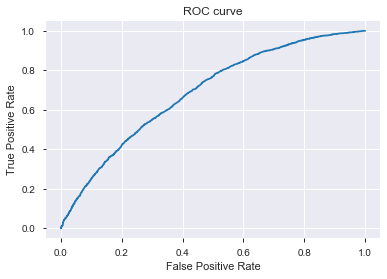

In [185]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [186]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)

0.6870485853549417

## Part 3: Visualization

> Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:
>
> - Permutation Importances
> - Partial Dependence Plot, 1 feature isolation
> - Partial Dependence Plot, 2 features interaction
> - Shapley Values

In [187]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [188]:
feature = 'Inspection Month'

isolated = pdp_isolate(
    model = pipeline,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1f124869da0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1f12dfabe48>})

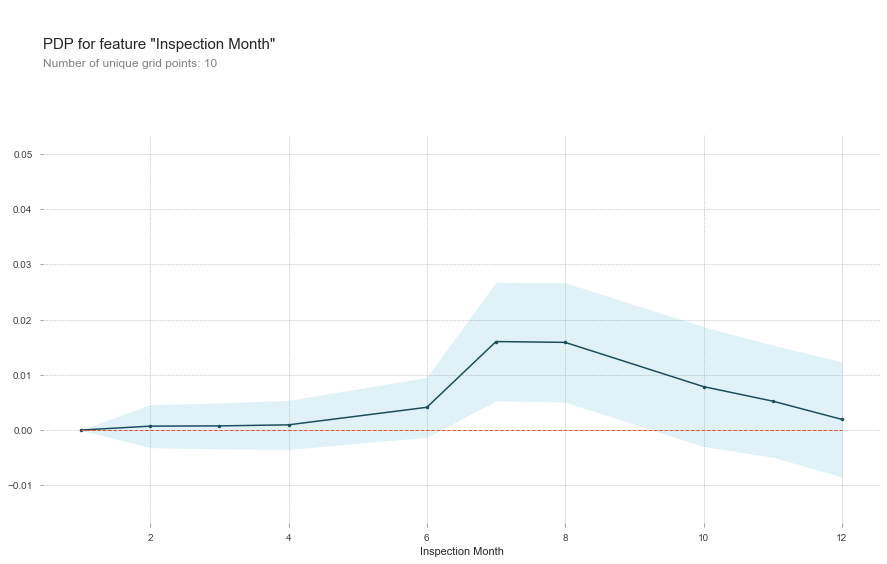

In [189]:
pdp_plot(isolated, feature_name=feature)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1f1333e2198>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1f1333f6c18>})

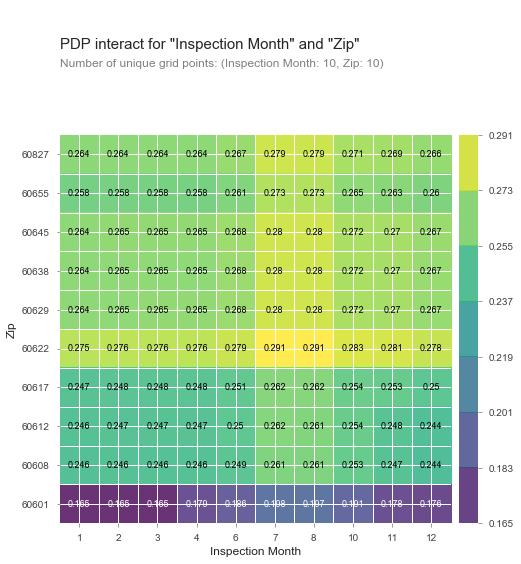

In [196]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Inspection Month', 'Zip']

interaction = pdp_interact(
    model = pipeline,
    dataset = X_val,
    model_features = X_val.columns,
    features = features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)